#  Intro a simulaciones dinámicas: péndulo simple.
<i> Daiana Dominikow - 2025 </i>

Como su nombre lo indica, una simulación dinámica pretende modelar el comportamiento de diferentes sistemas en el tiempo.<br> 
Para ello, a partir de las variables de estado del sistema ( posición, velocidad y aceleración son algunos ejemplos de variables que dependen del tiempo ) iremos iterando  una serie de veces para actualizar variables resultado ( energía cinética, fuerza, y distintas variables que dependan del estado).<br>
En principio, debemos saber las condiciones iniciales del sistema y aplicar un método numérico apropiado para la resolución de ecuaciones diferenciales ordinarias, en este caso, utilizarmentos el método de Euler.<br>

## Método de Euler
Éste busca la solución a una ecuación diferencial avanzando sobre la función en incrementos finitos.<br>
Con la ecuación horaria como dato, los pasos a seguir para dicha simulación serán<br>
- Pasarle a la simulación las condiciones iniciales.
- Chequear si la instancia de la simulación anterior fue la última (es decir, tenemos tantas simulaciones como valores discretos de tiempo).
    - Si no lo fuera, se actualizan las  variables de estado y a partir de estas las variables resultado.
    - Si lo fuera, finaliza la simulación y devuelve resultados para su posterior análisis

Éste es un método de primer orden, esto quiere decir que cada variable se calcula a partir de su valor en el tiempo anterior y el estado del sistema se actualiza en cada iteración.<br>
Su error local es proporcional al cuadrado del paso, y su error global es proporcional al tamaño del paso (es un acumulado de los errores locales).<br><br>
Consiste en seguir las tangentes de la función en cada punto, sabiendo que la derivada de la función (dato) representa la solución de una ecuación diferencial ordinaria entonces unimos el punto conocido con el punto a calcular a partir de una recta que tiene como pendiente esta derivada.<br>
Iterando múltiples veces, obtendremos datos que validarán el modelo y permitirán contrastarlo contra otros (como vimos en el apunte de derivadas), y/o compararlo con datos experimentales.<br><br>
Resumiendo, estamos tratanto de resolver ecuaciones de la forma 
$( \frac{\mathrm{d}y}{\mathrm{d}t} = f(t,y))$<br><br>
Ya conocido el método numérico de resolución de derivadas sabemos que
$( \frac{\mathrm{d}y}{\mathrm{d}t} = \frac{y(t+dt)-y(t)}{dt})$<br><br>
Entonces, reordenando:
$( y(t+dt) = \frac{\mathrm{d}y}{\mathrm{d}t}dt + y(t))$.<br><br>
Finalmente, podemos propagar iterando desde $( y_n )$  que corresponde al momento $( t )$, y obtener el valor de $( y_{n+1} )$  que corresponde al momento $( (t+dt) )$: <br>
$( y_{n+1} = y_n + \frac{\mathrm{d}y}{\mathrm{d}t} dt )$ <br><br>
$( y_{n+1} = y_n + f(t,y_n) dt )$<br><br>

## Supongamos un péndulo simple.
<center><img src="./resources/pendulo_simple.jpg" width="400" height="280" ></center>

Observemos que cuando la masa de este sistema oscilatorio pasa por el punto de equilibrio, la energía solo será cinética, mientras que cuando llega al extremo, ésta será solo potencial.

Tenemos dos coordenadas $(x,y)$ y un vínculo $x^2 + y^2 = l^2$, podemos hacer un cambio de coordenadas 
\begin{equation}
x = l \sin {\theta}
\end{equation}
\begin{equation}
y = l \cos{\theta}
\end{equation}

El lagrangiano se define como la diferencia entre la energía cinética y potencial $L = T- U$, donde
\begin{equation}
T = \frac{1}{2}m(\dot{x^2} + \dot{y^2})
\end{equation}

Y haciendo un cambio de coordenadas para depender solo de $\theta$
\begin{equation}
T = \frac{1}{2}m\dot{l^2} + \frac{1}{2}m l^2 \dot{\theta^2}
\end{equation}

Observemos que $l$ es constante, por lo tanto $\dot{l^2} = 0$ y el primer término de la energía cinética se anula.
\begin{equation}
U = - mgl \cos{\theta}
\end{equation}

El lagrangiano nos queda
\begin{equation}
L(\theta,\dot{\theta}) = \frac{1}{2}m l^2 \dot{\theta^2} + mgl\cos{\theta}
\end{equation}

\begin{equation}
\frac{\partial{L}}{\partial{\theta}} = \frac{d}{dt} \frac{\partial{L}}{\partial{\dot{\theta}}}
\end{equation} 

Vamos a resolver el lagrangiano por partes
\begin{equation}
\frac{\partial{L}}{\partial{\theta}} = \frac{\partial}{\partial{\theta}} - mgl \cos{\theta} = mgl \sin{\theta}
\end{equation}

\begin{equation}
\frac{\partial{L}}{\partial{\dot{\theta}}} = \frac{\partial}{\partial{\dot{\theta}}}(\frac{1}{2}m l^2 \dot{\theta^2}) = ml^2\dot{\theta} 
\end{equation}

\begin{equation}
\frac{d}{dt}(ml^2\dot{\theta}) = ml^2 \ddot{\theta}
\end{equation}

Por lo tanto, reordenando un poco, si no hubiera rosamiento, podemos describir el sistema como
\begin{equation}
-\frac{g}{l}\sin{\theta} = \ddot{\theta}
\end{equation}

Y si consideramos el rozamiento del aire $k$, un escenario mas real
\begin{equation}
-\frac{g}{l}\sin{\theta} - k\dot{\theta} = \ddot{\theta}
\end{equation}

Con esta ecuación de la aceleración en función al ángulo $\theta$, ya puedo pasar a las simulación del sistema

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

dt = 0.01
tf = 15
t = np.arange(0 , tf + dt ,dt) #segundos
#posición inicial de la masa
theta_inicial = 0.01 
#primer derivada, velocidad
dtheta_inicial = 1
l = 2 #m
G = -9.8 #m/s^2 constante
m = 3 #kg
k = 0.2 #coeficiente de rozamiento test



In [2]:
def pendulo(theta_inicial,dtheta_inicial,m,l,t, k = 0 ):
    i = 0
    #ángulo theta
    theta = np.zeros(len(t))
    theta[i] = theta_inicial
    dtheta = np.zeros(len(t))
    dtheta[i] = dtheta_inicial
    #energía del sistema
    U = np.zeros(len(t))
    U[i] = - m * G * l  *  (1 -math.cos(theta[i]) )
    T = np.zeros(len(t))
    T[i] = 1/2 *m*l**2 * dtheta[i]**2 

    while i < len(t)-1:
        
        dtheta[i+1] = dtheta[i] + ( G/l*math.sin(theta[i])- k*dtheta[i] ) * dt
        theta[i+1] = theta[i] + dtheta[i+1] * dt
        U[i+1] = - m * G * l  * (1 -  math.cos(theta[i+1]) )
        T[i+1] = 1/2 *m*l**2 * dtheta[i+1]**2 
        i = i+1

    if k != 0:
        k_string = ' con rozamiento'
    else:
        k_string = ''

    fig,( ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

    ax1.set_title(f'Posición en función del tiempo{k_string}')
    ax1.plot(t,theta, color = 'cyan', label = 'Posición' )
    ax1.set_ylabel('theta (rad)')
    ax1.set_xlabel('tiempo (s)')
    ax1.legend(loc='upper left')

    ax2.set_title(f'Energía en función del tiempo{k_string}')
    ax2.plot(t,U,color = 'lime', label = 'E. Potencial' )
    ax2.plot(t,T,color = 'tomato', label = 'E. Cinética' )
    ax2.plot(t,(U+T),color = 'blue', label = 'E. Total' )
    ax2.set_ylabel('Energía (J)')
    ax2.set_xlabel('Tiempo (s)')
    ax2.legend(loc='upper left')

    ax3.set_title(f'Diagrama de fase{k_string}')
    ax3.plot(theta,dtheta,color = 'teal')
    ax3.set_ylabel('Velocidad (m/s)')
    ax3.set_xlabel('Posición (rad)')
    ax3.legend(loc='upper left')

    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


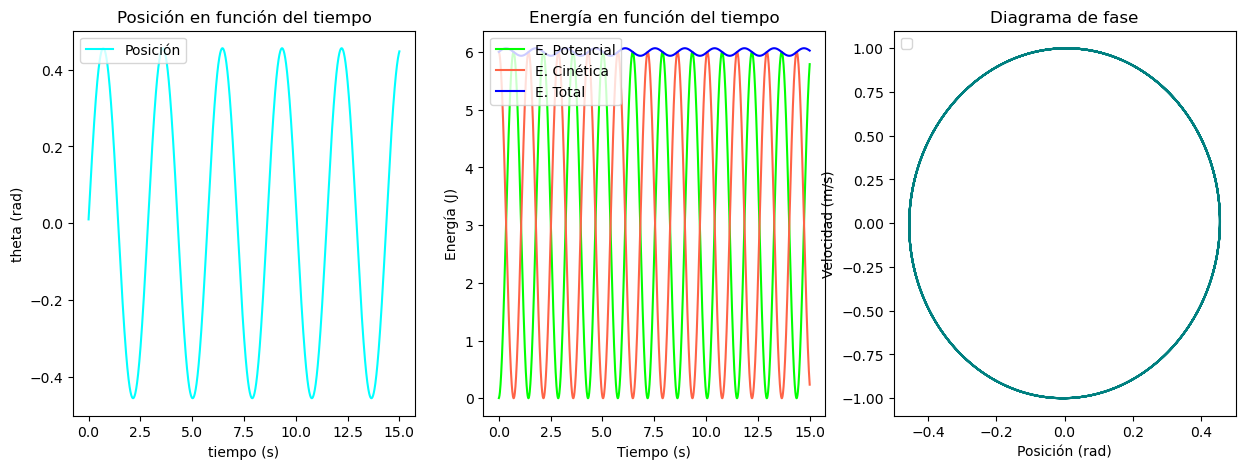

In [3]:
#sin rozamiento
pendulo(theta_inicial,dtheta_inicial,m,l,t)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


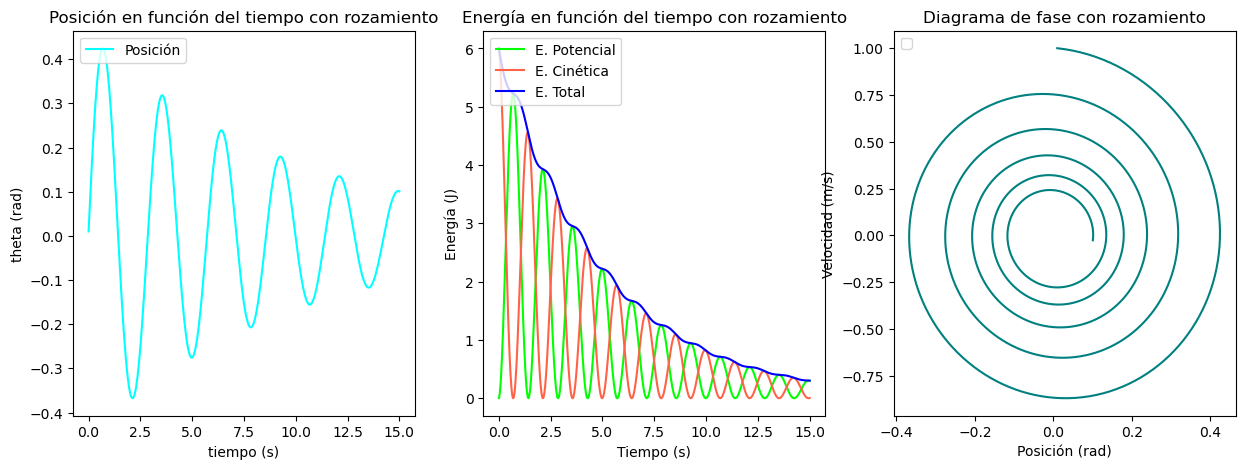

In [4]:
#con rozamiento ---- falta desarrollar demostración (2025-02-07)
pendulo(theta_inicial,dtheta_inicial,m,l,t,k)